# Medical Data Visualizer Project

In this notebook, data collected from different medical examinations can be visualised through matplotlib, seaborn and pandas.

## Preparing the tools

Pandas, Matplotlib, Seaborn and NumPy for data analysis and manipulation.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import data

The dataset was retrieved from [FreeCodeCamp](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer), downloaded in csv format and then imported into the project.

In [3]:
# Import data
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Reorganisation and modification of data

In [41]:
# Add 'overweight' column
height = df['height']/100
df['bmi'] = df['weight'] / height**2
df['overweight'] = 0
df.loc[df['bmi']  > 25, 'overweight'] = 1

In [42]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [6]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, 
# make the value 0. If the value is more than 1, make the value 1.
# gluc normalization:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,23.011177,0


In [8]:
# cholesterol normalization:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


## Categorical Plot

In [25]:
# Draw Categorical Plot

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 
# and 'overweight'.

# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the 
# columns for the catplot to work correctly.

def draw_cat_plot(): 
    long_form_df = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat = pd.DataFrame(
    long_form_df.groupby(['cardio', 'variable', 'value'])['value'].count()).rename(columns={'value': 'total'}).reset_index()
    cat_plot = sns.catplot(
        data=df_cat,
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        kind='bar')

    fig = cat_plot.fig

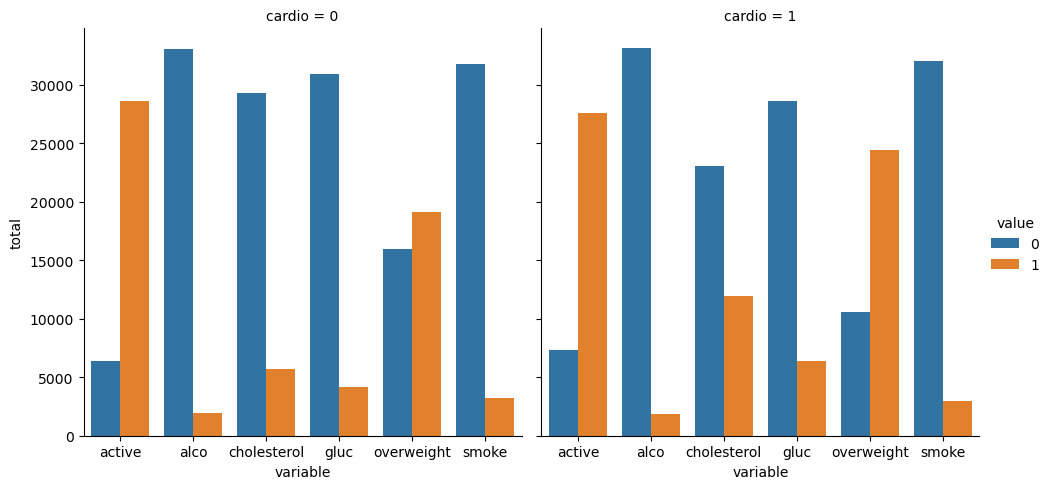

In [26]:
draw_cat_plot()

## Heat Map

In [39]:
# Draw Heat Map
def draw_heat_map(): 
#Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])
              & (df['height'] >= df['height'].quantile(0.025))
              & (df['height'] <= df['height'].quantile(0.975))
              & (df['weight'] >= df['weight'].quantile(0.025))
              & (df['weight'] <= df['weight'].quantile(0.975))]
    df_heat = df_heat.drop(['bmi'], axis=1)
# Calculate the correlation matrix
    corr = df_heat.corr()
# Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with 'sns.heatmap()'
    heat_map = sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, cmap='icefire', vmin=-0.1, vmax=0.25, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Do not modify the next two lines
    fig.savefig('heatmap.png')

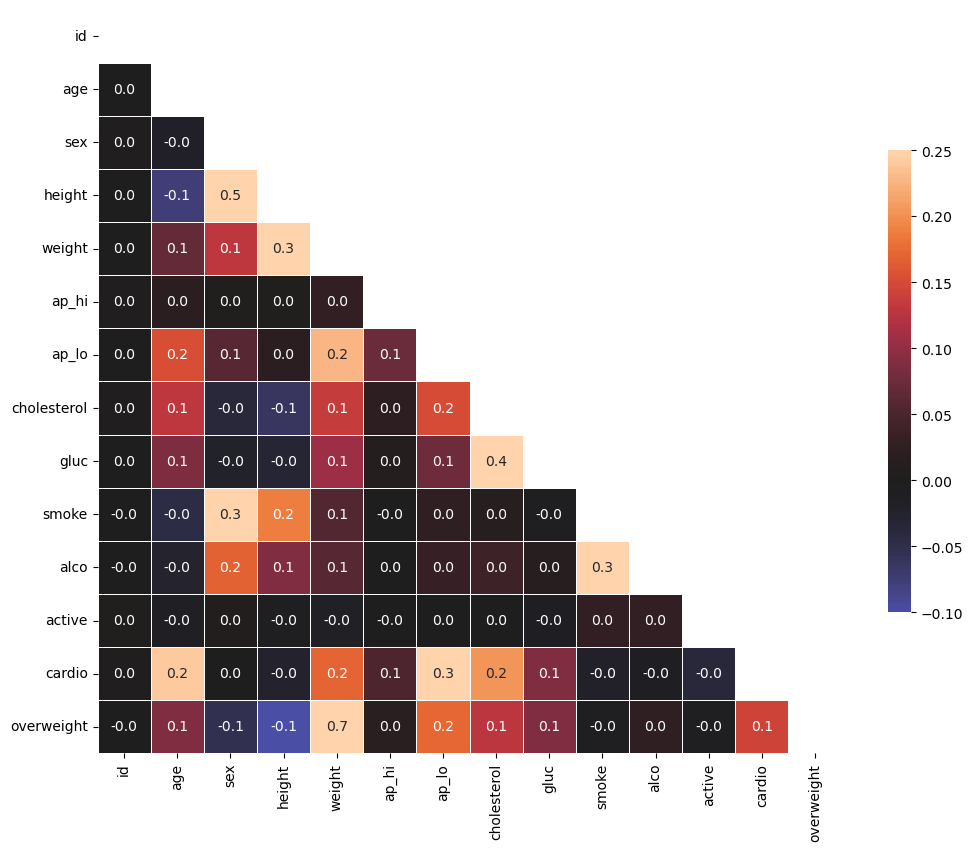

In [40]:
draw_heat_map()